# Task 2
## Author: Sergey Morozov

Numer of Samples: 118
Number of 1s:     58
Number of 0s:     60
Data Head Preview
 [[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]] 
...
 Data Tail Preview
 [[-0.48445    0.99927    0.       ]
 [-0.0063364  0.99927    0.       ]
 [ 0.63265   -0.030612   0.       ]]


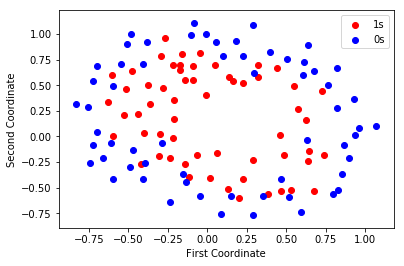

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# load data
data = np.loadtxt('chips.txt', delimiter=',')
X = data[:,0:2]   # 2D points
y = data[:, 2]    # classes (0 or 1)

# look into the data
print('Numer of Samples:', len(data))
print('Number of 1s:    ', len(np.where(y == 1)[0]))
print('Number of 0s:    ', len(np.where(y == 0)[0]))
print("Data Head Preview\n", data[0:3], "\n...\n", "Data Tail Preview\n", data[-3:])

# visualize the data
inds_one = np.where(y == 1)
inds_zero = np.where(y == 0)
plt.scatter(X[inds_one][:,0], X[inds_one][:,1], c='red', label='1s')
plt.scatter(X[inds_zero][:,0], X[inds_zero][:,1], c='blue', label='0s')
plt.xlabel('First Coordinate')
plt.ylabel('Second Coordinate')
plt.legend()
plt.show()

/home/aoool/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/aoool/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Best Estimator
 SVC(C=0.20000000000000001, cache_size=200, class_weight=None, coef0=2.0,
  decision_function_shape='ovr', degree=10.0, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


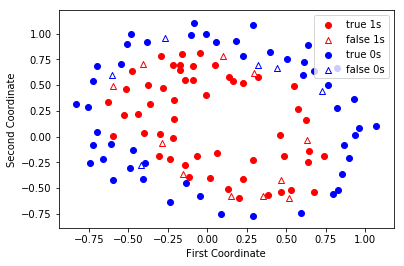

In [2]:
##########################
# Support Vector Machine #
##########################

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# support vector classifier
svc = SVC()

# parameter tuner for 'svc'
params = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 
          'C': np.linspace(0.1, 10, 100),
          'degree': np.linspace(1, 10, 10),
          'coef0': np.linspace(-2, 2, 5)}
clf = GridSearchCV(svc, params)
clf.fit(X, y) 
print('Best Estimator\n', clf.best_estimator_)

pred_y_svc = clf.predict(X)
pred_inds_one = np.where(pred_y_svc == 1)
pred_inds_zero = np.where(pred_y_svc == 0)

def get_true_false_pred_inds_pair(pred_inds, inds):
    """Get pair of (<true prediction>, <false prediction>)"""
    false_pred = np.setdiff1d(pred_inds, inds)
    true_pred = np.setdiff1d(pred_inds, false_pred)
    return true_pred, false_pred

true_pred_inds_one, false_pred_inds_one = get_true_false_pred_inds_pair(pred_inds_one, inds_one)
true_pred_inds_zero, false_pred_inds_zero = get_true_false_pred_inds_pair(pred_inds_zero, inds_zero)

# correctly classified 1s
plt.scatter(X[true_pred_inds_one][:,0], 
            X[true_pred_inds_one][:,1], 
            c='red', marker='o', label='true 1s')

# incorrectly classified 1s
plt.scatter(X[false_pred_inds_one][:,0], 
            X[false_pred_inds_one][:,1], 
            c='white', marker='^', edgecolors='red', label='false 1s')

# correctly classified 0s
plt.scatter(X[true_pred_inds_zero][:,0], 
            X[true_pred_inds_zero][:,1], 
            c='blue', marker='o', label='true 0s')

# incorrectly classified 0s
plt.scatter(X[false_pred_inds_zero][:,0], 
            X[false_pred_inds_zero][:,1], 
            c='white', marker='^', edgecolors='blue', label='false 0s')

plt.xlabel('First Coordinate')
plt.ylabel('Second Coordinate')
plt.legend()
plt.show()


Best Estimator
 KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=8,
           weights='distance')


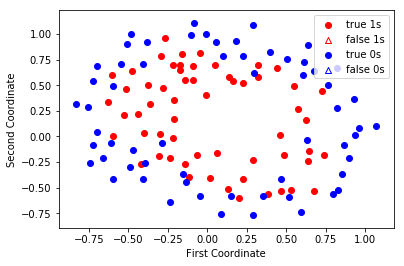

In [3]:
#######################
# k-Nearest Neighbors #
#######################

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# k-nearest neighbors classifier
knn = KNeighborsClassifier()

# parameter tuner for 'knn'
params = {'n_neighbors': np.arange(1, 50),
          'p': np.arange(1, 10),
          'algorithm': ['ball_tree', 'kd_tree', 'brute'],
          'weights': ['uniform', 'distance']}
clf = GridSearchCV(knn, params)
clf.fit(X, y) 
print('Best Estimator\n', clf.best_estimator_)

pred_y_knn = clf.predict(X)
pred_inds_one = np.where(pred_y_knn == 1)
pred_inds_zero = np.where(pred_y_knn == 0)

true_pred_inds_one, false_pred_inds_one = get_true_false_pred_inds_pair(pred_inds_one, inds_one)
true_pred_inds_zero, false_pred_inds_zero = get_true_false_pred_inds_pair(pred_inds_zero, inds_zero)

# correctly classified 1s
plt.scatter(X[true_pred_inds_one][:,0], 
            X[true_pred_inds_one][:,1], 
            c='red', marker='o', label='true 1s')

# incorrectly classified 1s
plt.scatter(X[false_pred_inds_one][:,0], 
            X[false_pred_inds_one][:,1], 
            c='white', marker='^', edgecolors='red', label='false 1s')

# correctly classified 0s
plt.scatter(X[true_pred_inds_zero][:,0], 
            X[true_pred_inds_zero][:,1], 
            c='blue', marker='o', label='true 0s')

# incorrectly classified 0s
plt.scatter(X[false_pred_inds_zero][:,0], 
            X[false_pred_inds_zero][:,1], 
            c='white', marker='^', edgecolors='blue', label='false 0s')

plt.xlabel('First Coordinate')
plt.ylabel('Second Coordinate')
plt.legend()
plt.show()

In [20]:
#################################################
# Support Vector Machine vs k-Nearest Neighbors #
#################################################

from sklearn.metrics import classification_report

target_names = ['1s', '0s']
report_svc = classification_report(y, pred_y_svc, target_names=target_names)
report_knn = classification_report(y, pred_y_knn, target_names=target_names)
print('classification_report')
print('SVC\n', report_svc)
print('kNN\n', report_knn)
print()

classification_report
SVC
              precision    recall  f1-score   support

         1s       0.89      0.82      0.85        60
         0s       0.83      0.90      0.86        58

avg / total       0.86      0.86      0.86       118

kNN
              precision    recall  f1-score   support

         1s       1.00      1.00      1.00        60
         0s       1.00      1.00      1.00        58

avg / total       1.00      1.00      1.00       118


